In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

X_train = train_data.iloc[:, 1:].values / 255
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values / 255
y_test = test_data.iloc[:, 0].values

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [4]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='sigmoid'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()

In [5]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8073 - loss: 0.5323 - val_accuracy: 0.9007 - val_loss: 0.2843
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8997 - loss: 0.2733 - val_accuracy: 0.9101 - val_loss: 0.2491
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9176 - loss: 0.2234 - val_accuracy: 0.9164 - val_loss: 0.2306
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9303 - loss: 0.1893 - val_accuracy: 0.9192 - val_loss: 0.2259
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9418 - loss: 0.1632 - val_accuracy: 0.9176 - val_loss: 0.2350
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9508 - loss: 0.1348 - val_accuracy: 0.9193 - val_loss: 0.2409
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9583 - loss: 0.1159 - val_accuracy: 0.9221 - val_loss: 0.2519
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9654 - loss: 0.0966 - 

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Testing Accuracy : {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9155 - loss: 0.3010
Testing Accuracy : 91.88%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step
Accuracy: 91.88%


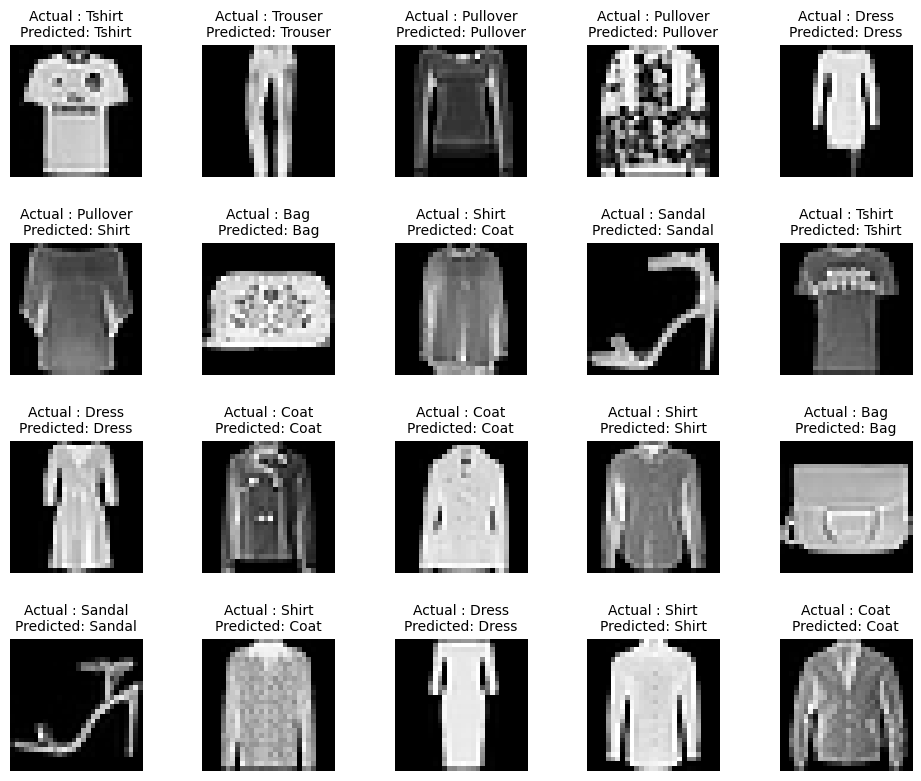

In [15]:
class_labels = ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

def predict_classes(X):
    predictions = model.predict(X)
    return np.argmax(predictions, axis=1)

predicted_classes = predict_classes(X_test)
actual_classes = np.argmax(y_test, axis=1)

def plot_images(images, actual, predicted, class_labels):
    plt.figure(figsize=(12,12))
    for i in range(20):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i].reshape(28,28), cmap='gray')
        plt.title(f"Actual : {class_labels[actual[i]]}\nPredicted: {class_labels[predicted[i]]}", fontsize=10)
        plt.axis('off')
        plt.subplots_adjust(hspace=0.5)
    plt.show()

print(f"Accuracy: {accuracy * 100:.2f}%")
plot_images(X_test, actual_classes, predicted_classes, class_labels)